# MNIST Dynamic Filter Classification

Note: This notebook is desinged to run with Python3 and GPU runtime.<br>

Modified for local (off-line) mode with Python 3.x, TensorFlow 1.x (or 2.x), with or without GPU<br>
2020/02/04: By H.Nishiyama<br>

This notebook rewrite for local (off-line) TensorFlow 1.x (or 2.x).<br>
*If you use on online-colaboratory system, remove "###" from the top of lines in code cells. <br>
Original notebook uses TensorFlow 2.x.

In [1]:
###%tensorflow_version 2.x

####[MDF-01]
Import modules and set random seeds.

In [2]:
import numpy as np
from pandas import DataFrame

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist

np.random.seed(20190222)
#--- For TensorFlow 1.x, use the following line, but if you use TensorFlow2.x, you need to comment it out..
tf.random.set_random_seed(20190222)
#--- For TensorFlow 2.x, use following line, instead of upper line.
###tf.random.set_seed(20190222)

####[MDF-02]
Download the MNIST dataset and store into NumPy arrays.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

####[MDF-03]
Define a CNN model with a single convolutional filter layer.

In [4]:
model = models.Sequential()
model.add(layers.Reshape((28, 28, 1), input_shape=(28*28,), name='reshape'))
model.add(layers.Conv2D(16, (5, 5), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(1024, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv_filter (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling (MaxPooling2D)   (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
hidden (Dense)               (None, 1024)              3212288   
_______________________________________________________

####[MDF-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [5]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['acc'])

####[MDF-05]
Train the model. It achieves the 99.0% accuracy.<br>
*Note: It takes more than 5 minutes without GPU.

In [6]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 38s 639us/sample - loss: 0.1658 - acc: 0.9506 - val_loss: 0.0529 - val_acc: 0.9826
Epoch 2/10
60000/60000 [==============================] - 37s 618us/sample - loss: 0.0504 - acc: 0.9845 - val_loss: 0.0453 - val_acc: 0.9854
Epoch 3/10
60000/60000 [==============================] - 39s 643us/sample - loss: 0.0307 - acc: 0.9909 - val_loss: 0.0419 - val_acc: 0.9862
Epoch 4/10
60000/60000 [==============================] - 39s 658us/sample - loss: 0.0222 - acc: 0.9931 - val_loss: 0.0344 - val_acc: 0.9874
Epoch 5/10
60000/60000 [==============================] - 39s 642us/sample - loss: 0.0145 - acc: 0.9956 - val_loss: 0.0314 - val_acc: 0.9902
Epoch 6/10
60000/60000 [==============================] - 37s 624us/sample - loss: 0.0100 - acc: 0.9966 - val_loss: 0.0463 - val_acc: 0.9859
Epoch 7/10
60000/60000 [==============================] - 37s 618us/sample - loss: 0.0081 - acc: 0.9976 

####[MDF-06]
Plot charts for the accuracy and loss values.

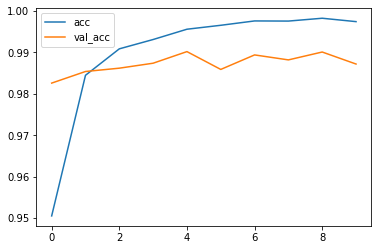

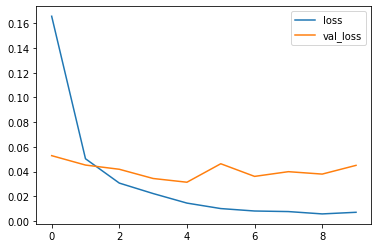

In [7]:
DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot()
DataFrame({'loss': history.history['loss'], 
           'val_loss': history.history['val_loss']}).plot()

####[MDF-07]
Modified to local (off-line) system.<br>
Original: Mount your Google Drive on `/content/gdrive`.<br>
Modified: Nothing.

In [8]:
###from google.colab import drive
###drive.mount('/content/gdrive')

####[MDF-08]
Modified to local (off-line) system.<br>
Original: Export the trained model as a file `MNIST_single.hd5` on your Google Drive.<br>
Modified: Export the trained model as a file `MNIST_single.hd5` on your /tmp/ directory.<br>

In [9]:
###model.save('/content/gdrive/My Drive/MNIST_single.hd5', save_format='h5')
# For local (off-line) mode, saving file to /tmp/ directroy.
model.save('/tmp/MNIST_single.hd5', save_format='h5')
###!ls -lh '/content/gdrive/My Drive/MNIST_single.hd5'